In [1]:
import pandas as pd 
import os
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from subprocess import check_output
import numpy as np
import matplotlib.pyplot as plt
import warnings
import math
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.arima.model import ARIMAResults
from pandas import datetime
from sklearn.metrics import mean_squared_error
df = pd.read_csv("../Resources/btcjoin.csv", index_col='date', parse_dates=['date'])
df = df.drop(columns=['volume','change', 'low', 'high', 'open'])
df = df.rename(columns={"value": "wallets"})
print(df.head())

           price  wallets  address      mined
date                                         
2010-09-25   0.1        2    656.0  4109450.0
2010-09-26   0.1        2    444.0  4110750.0
2010-09-27   0.1        2   1070.0  4132150.0
2010-09-28   0.1        2   1503.0  4133200.0
2010-09-29   0.1        2   1049.0  4148050.0


C:\Users\16474\AppData\Local\Temp\ipykernel_1860\862038253.py:14: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
df['time'] = np.arange(len(df.index))

df.tail()

,price,wallets,address,mined,time
date,,,,,
2022-10-21,"19,162.60",84879615,924681.0,19185681.25,4381
2022-10-22,"19,204.80",84888147,830404.0,19186618.75,4382
2022-10-23,"19,571.20",84893809,804140.0,19187600.00,4383
2022-10-24,"19,331.50",84902680,919344.0,19188556.25,4384
2022-10-25,"20,073.10",84909074,826804.0,19189162.50,4385


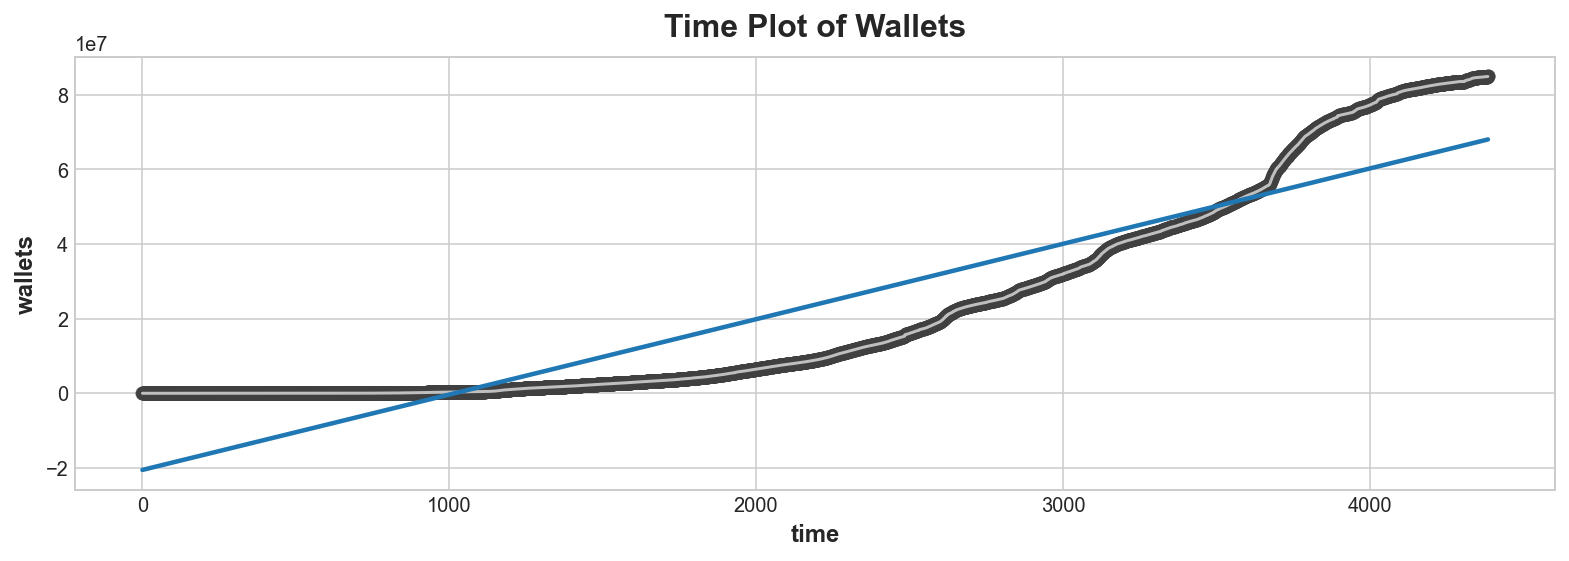

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-whitegrid")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
%config InlineBackend.figure_format = 'retina'

fig, ax = plt.subplots()
ax.plot('time', 'wallets', data=df, color='0.75')
ax = sns.regplot(x='time', y='wallets', data=df, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Time Plot of Wallets');

In [4]:
df = df.reset_index()
# df['price']=df['wallets'].str.replace(',','')
df['price'] = df['wallets'].astype(float)

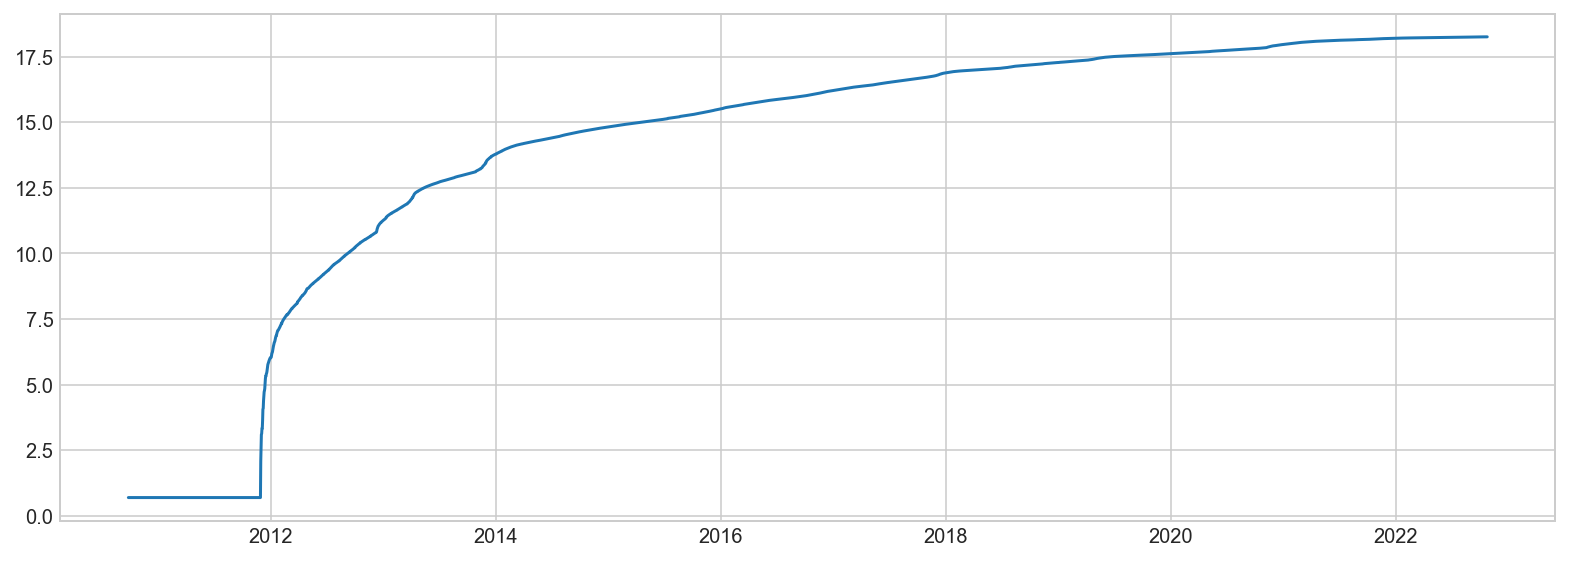

In [5]:
plt.plot(df['date'], np.log(df['wallets']))

In [6]:
from scipy.optimize import curve_fit
# Logarithmic function to fit against
def logFunc(x, p1, p2):
    return p1*np.log(x) + p2

ydata = np.log(df['wallets'])
xdata = [x+1 for x in range(len(df))]
popt, pcov = curve_fit(logFunc, xdata, ydata, p0=(3.0,-10))

print(popt)
print(pcov)

[  4.89699165 -22.10488098]
[[ 0.00069433 -0.00512925]
 [-0.00512925  0.03857916]]


In [7]:
fittedYdata = logFunc(np.array([x+1 for x in range(len(df))]), popt[0], popt[1])
fittedYdata

array([-22.10488098, -18.71054503, -16.72498578, ...,  18.95990428,
        18.96102116,  18.9621378 ])

Text(0, 0.5, 'price')

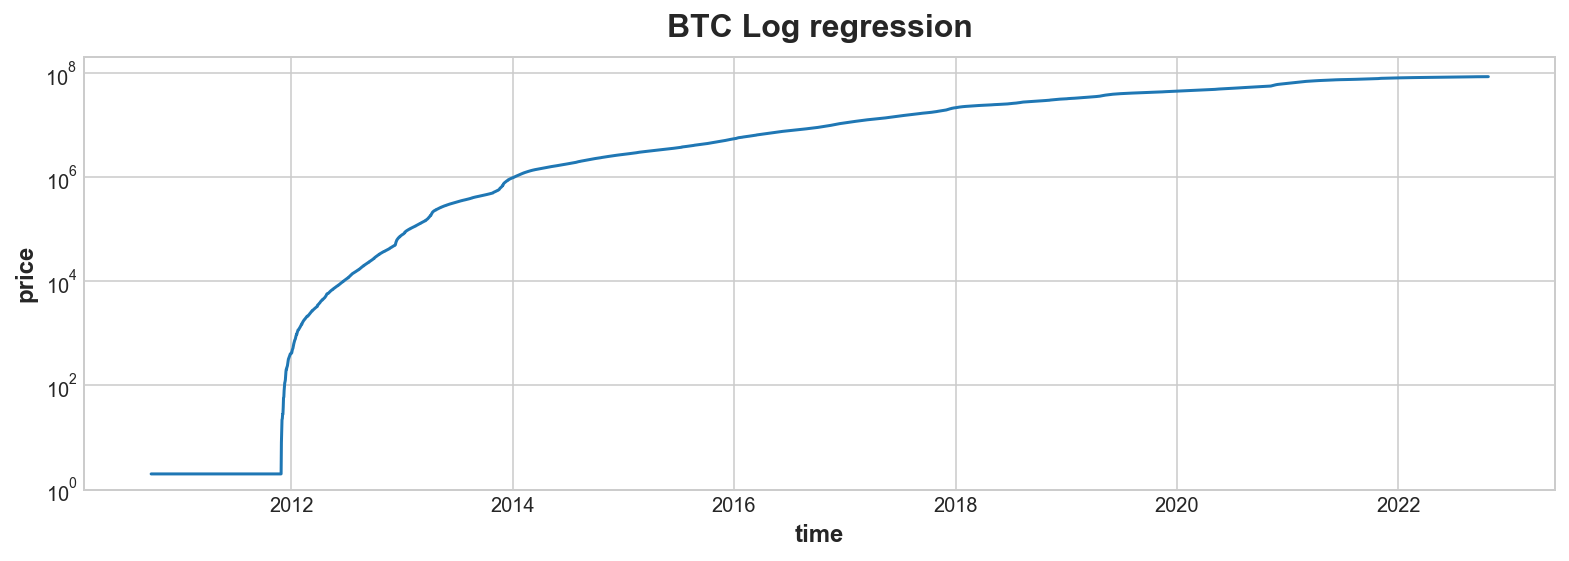

In [8]:
plt.semilogy(df['date'], df['wallets'])
for i in range(0, 0):
    plt.plot(df['date'], np.exp(fittedYdata+i))
plt.ylim(bottom=1)

plt.title('BTC Log regression')

plt.xlabel('time')
plt.ylabel('price')